# Vacunación vs COVID alrededor del mundo
- Progeso de vacunación durante el año. *En cierto paises como ha sido

In [1]:
import pandas as pd
import numpy as np
#import statsmodels as sm #estadisticas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemo el dataseeet
data = pd.read_csv('C:\\Big Data\\country_vaccinations.csv')

In [3]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [4]:
data.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [5]:
data.shape

(52739, 15)

In [6]:
#Preprocesamiento de información
#Ejmeplo de remplazo y cambio de tipo de dato
data["date"] = data["date"].str.replace('-','/')

In [7]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021/02/22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021/02/23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021/02/24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021/02/25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021/02/26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021/10/17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021/10/18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021/10/19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021/10/20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [8]:
data["date"] = data["date"].str.replace('/','-')

In [9]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [10]:
#limpieza de la información
data.isnull().sum() #suma si son nulos

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     24245
people_vaccinated                      25575
people_fully_vaccinated                28535
daily_vaccinations_raw                 29428
daily_vaccinations                       262
total_vaccinations_per_hundred         24245
people_vaccinated_per_hundred          25575
people_fully_vaccinated_per_hundred    28535
daily_vaccinations_per_million           262
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [11]:
#Estadistica : muestra los porcentajes de la informacion faltantes por columna
data.isnull().sum()/data.shape[0] #shapes: (rows, cols)

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.459717
people_vaccinated                      0.484935
people_fully_vaccinated                0.541061
daily_vaccinations_raw                 0.557993
daily_vaccinations                     0.004968
total_vaccinations_per_hundred         0.459717
people_vaccinated_per_hundred          0.484935
people_fully_vaccinated_per_hundred    0.541061
daily_vaccinations_per_million         0.004968
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [12]:
data.shape

(52739, 15)

In [13]:
#Eliminar los Nan que existen
datosLimpios = data.dropna()

In [14]:
datosLimpios

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
260,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
342,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
343,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,22.02,15.48,6.54,3784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [15]:
datosLimpios.shape

(20079, 15)

In [16]:
#revisamos los datos que quedan
datosLimpios.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [17]:
conjunto_datosLimpios = datosLimpios[["country", "date", "total_vaccinations"]]
conjunto_datosLimpios

,country,date,total_vaccinations
94,Afghanistan,2021-05-27,593313.0
101,Afghanistan,2021-06-03,630305.0
260,Albania,2021-02-18,3049.0
342,Albania,2021-05-11,622507.0
343,Albania,2021-05-12,632676.0
...,...,...,...
52734,Zimbabwe,2021-10-17,5701675.0
52735,Zimbabwe,2021-10-18,5742988.0
52736,Zimbabwe,2021-10-19,5756747.0
52737,Zimbabwe,2021-10-20,5780767.0


In [18]:
#Subconjunto: Mexico
mx = conjunto_datosLimpios.loc[conjunto_datosLimpios["country"]=="Mexico"]
#prints the subset data frame to prepare plotting
mx 

,country,date,total_vaccinations
30265,Mexico,2021-01-15,417375.0
30266,Mexico,2021-01-16,463246.0
30267,Mexico,2021-01-17,472142.0
30268,Mexico,2021-01-18,492529.0
30269,Mexico,2021-01-19,498122.0
...,...,...,...
30535,Mexico,2021-10-12,108947179.0
30541,Mexico,2021-10-18,112603277.0
30542,Mexico,2021-10-19,112996000.0
30543,Mexico,2021-10-20,113471215.0


In [19]:
mx.dtypes

country                object
date                   object
total_vaccinations    float64
dtype: object

In [20]:
#Conversion de float a int
mx["total_vaccinations"].astype(int)

30265       417375
30266       463246
30267       472142
30268       492529
30269       498122
           ...    
30535    108947179
30541    112603277
30542    112996000
30543    113471215
30544    113957610
Name: total_vaccinations, Length: 235, dtype: int32

In [21]:
mx.dtypes

country                object
date                   object
total_vaccinations    float64
dtype: object

In [22]:
import numpy as np

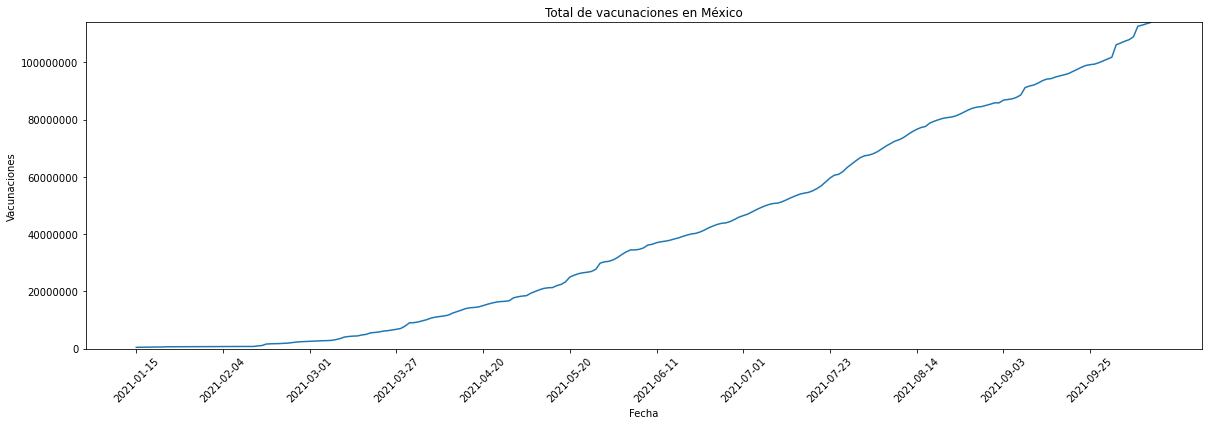

In [23]:
#Representacion visual de los datos
#Ejes
x = mx["date"]
y = mx["total_vaccinations"]
#Creando el plot
plt.figure(figsize=(20,6))
plt.plot(x,y)
ax = plt.gca() #actia la proyeccion del plot para configuración
ax.get_yaxis().get_major_formatter().set_scientific(False) #Para el eje Y lo mueste con numero completo y no cientifico
plt.xticks(np.arange(0, len(x), step = 20), rotation = 45)
plt.ylim(0, max(y))
plt.title("Total de vacunaciones en México")
plt.xlabel("Fecha")
plt.ylabel("Vacunaciones")

plt.show()

Text(0, 0.5, 'Vacunaciones')

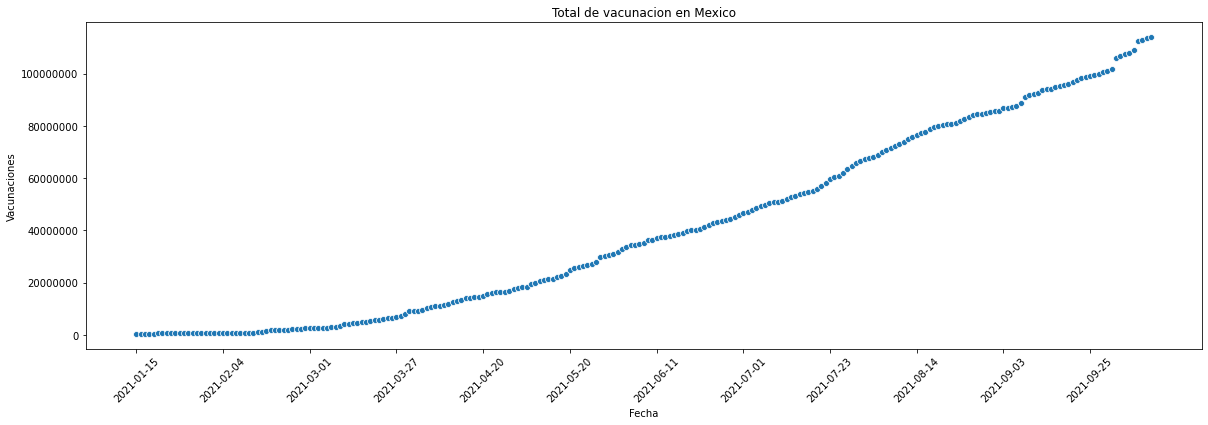

In [24]:
#Ahora con sns
plt.figure(figsize = (20,6))
plt.title("Total de vacunacion en Mexico")
sns.scatterplot(x = mx['date'], y = mx['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 20), rotation = 45)
plt.xlabel("Fecha")
plt.ylabel("Vacunaciones")

In [25]:
#Creamos una lista de la cabaceras
list(datosLimpios.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [26]:
ccDatosLimpios = datosLimpios.copy()

In [27]:
ccDatosLimpios

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
260,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
342,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
343,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,22.02,15.48,6.54,3784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [28]:
#Normalizando la información
#agregamos columnas y las transformamos (las variables) 
#a datos logaritmicos base 10 
#corr + fuerte
ccDatosLimpios['total_vacc'] = np.log10(ccDatosLimpios['total_vaccinations'])
ccDatosLimpios['people_vacc'] = np.log10(ccDatosLimpios['people_vaccinated'])
ccDatosLimpios['people_fully_vacc'] = np.log10(ccDatosLimpios['people_fully_vaccinated'])
ccDatosLimpios['daily_vacc'] = np.log10(ccDatosLimpios['daily_vaccinations'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
ccDatosLimpios['total_vacc'] = np.log10(ccDatosLimpios['total_vaccinations'])
ccDatosLimpios['people_vacc'] = np.log10(ccDatosLimpios['people_vaccinated'])
ccDatosLimpios['people_fully_vacc'] = np.log10(ccDatosLimpios['people_fully_vaccinated'])
ccDatosLimpios['daily_vacc'] = np.log10(ccDatosLimpios['daily_vaccinations'])

ValueError: could not convert string to float: 'Afghanistan'

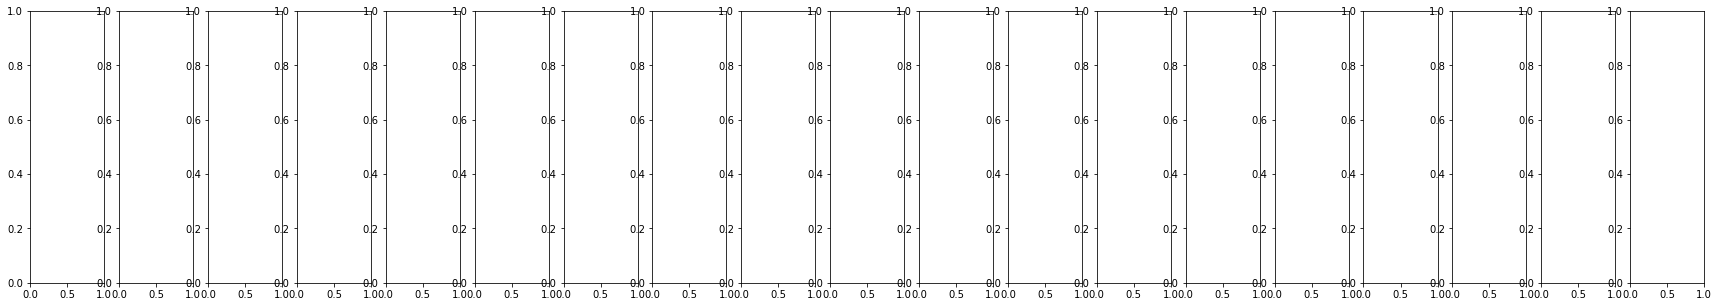

In [31]:
#Marca error
#Falta crear otro dataset para que funcione
fig, axes = plt.subplots(ncols=len(ccDatosLimpios.columns), figsize=(30,5))
for ax, col in zip(axes, ccDatosLimpios.columns):
    sns.distplot(ccDatosLimpios[col], ax=ax)  #Hay que eliminar datos str
    plt.tight_layout() 
plt.show()

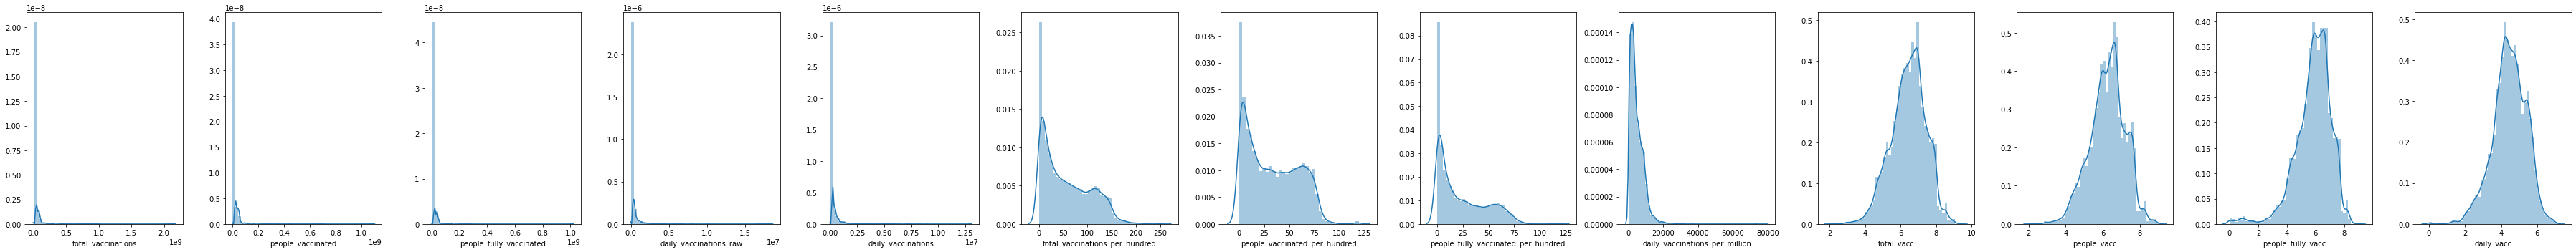

In [32]:
cc = ccDatosLimpios.drop(['country', 'iso_code', 'date', 'vaccines', 'source_name', 'source_website'], axis = 1)
cc = cc.replace([np.inf, -np.inf],0)
fig, axes = plt.subplots(ncols=len(cc.columns), figsize=(50,5))
for ax, col in zip(axes, cc.columns):
    sns.distplot(cc[col], ax=ax)  #Hay que eliminar datos str
    plt.tight_layout() 
plt.show()

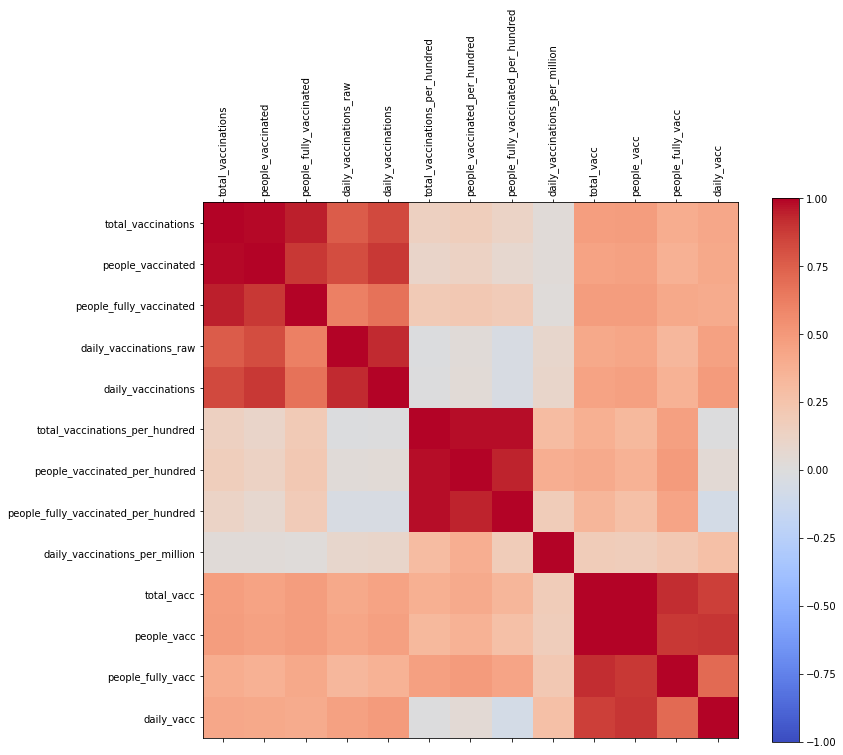

In [33]:
#Creamos un mapa de calor para ver la correlaciones entre variables
corr = cc.corr()
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(cc.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [34]:
#Guardando la informacion
cc.to_excel("cc.xlsx", sheet_name='cc', index=False)

In [35]:
ccDatosLimpios

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,total_vacc,people_vacc,people_fully_vacc,daily_vacc
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,5.773284,5.680856,5.055909,3.812044
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,5.799551,5.682867,5.171741,3.723045
260,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,3.484157,3.387034,2.786041,2.404834
342,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,5.794144,5.644361,5.259082,4.084934
343,Albania,ALB,2021-05-12,632676.0,444755.0,187921.0,10169.0,10870.0,22.02,15.48,6.54,3784.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,5.801181,5.648121,5.273975,4.036230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52734,Zimbabwe,ZWE,2021-10-17,5701675.0,3221576.0,2480099.0,13717.0,17164.0,37.78,21.35,16.43,1137.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,6.756002,6.508068,6.394469,4.234619
52735,Zimbabwe,ZWE,2021-10-18,5742988.0,3241469.0,2501519.0,41313.0,21169.0,38.05,21.48,16.57,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,6.759138,6.510742,6.398204,4.325700
52736,Zimbabwe,ZWE,2021-10-19,5756747.0,3247552.0,2509195.0,13759.0,20610.0,38.14,21.52,16.63,1366.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,6.760177,6.511556,6.399534,4.314078
52737,Zimbabwe,ZWE,2021-10-20,5780767.0,3257360.0,2523407.0,24020.0,21176.0,38.30,21.58,16.72,1403.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,6.761985,6.512866,6.401987,4.325844


In [36]:
ccDatosLimpios.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
total_vacc                             float64
people_vacc                            float64
people_fully_vacc                      float64
daily_vacc                             float64
dtype: object

In [37]:
ccDatosLimpios.shape

(20079, 19)

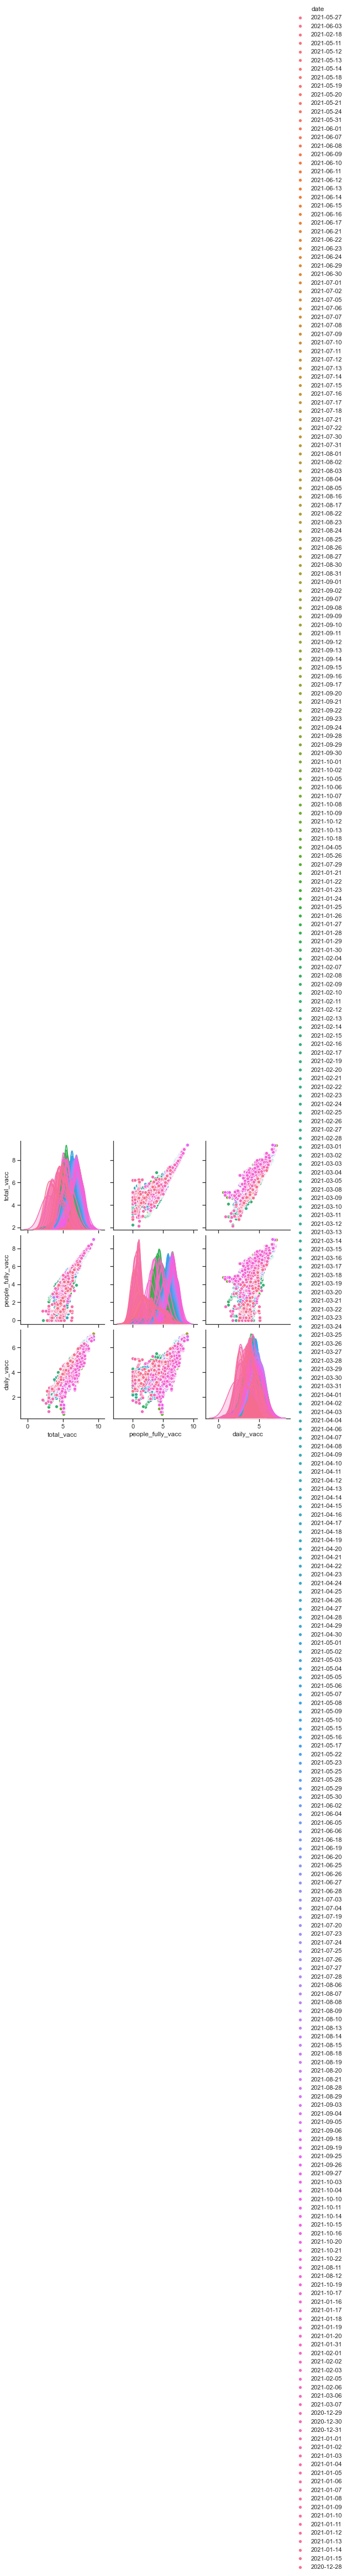

In [40]:
import seaborn as sns
covid = ccDatosLimpios[['date', 'total_vacc', 'people_fully_vacc', 'daily_vacc']]
#sns.set_style("ticks")
sns.set(style="ticks")
#ds = sns.load_dataset(covid)
sns.pairplot(covid, hue = "date") #palette ="pastel"

In [42]:
#Creamos conjunto por pais, Trabajamos sobre el DF de datosLimpios
Mexico = datosLimpios.loc[datosLimpios["country"]=="Mexico"]
Israel = datosLimpios.loc[datosLimpios["country"]=="Israel"]
US = datosLimpios.loc[datosLimpios["country"]=="United States"]
Canada = datosLimpios.loc[datosLimpios["country"]=="Canada"]
UK = datosLimpios.loc[datosLimpios["country"]=="United Kingdom"]
China = datosLimpios.loc[datosLimpios["country"]=="China"]

In [44]:
#Combinamos es un DF
paises = pd.concat([Mexico, Israel, US, Canada, UK, China], axis=0)

Text(0, 0.5, 'vacunaciones')

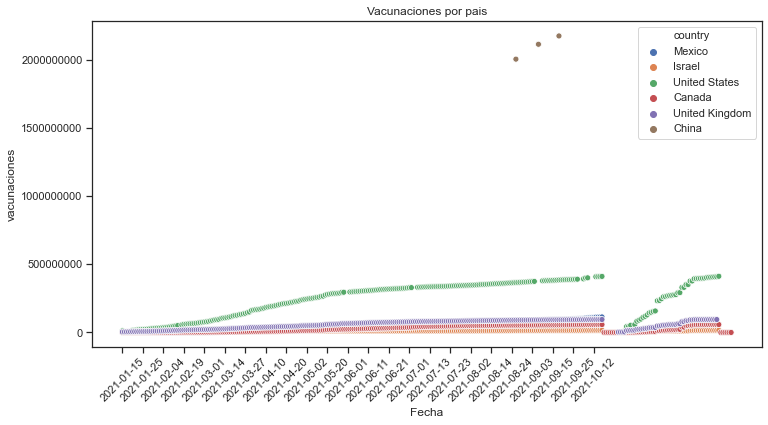

In [48]:
plt.figure(figsize=(12,6))
plt.title("Vacunaciones por pais")
sns.scatterplot(x = paises['date'], y=paises['total_vaccinations'], hue=paises['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x),step = 10), rotation = 45)
plt.xlabel("Fecha")
plt.ylabel("vacunaciones")

In [51]:
#Con dataset original
#Creamos conjunto por pais, Trabajamos sobre el DF de datosLimpios
Mexico = data.loc[data["country"]=="Mexico"]
Israel = data.loc[data["country"]=="Israel"]
US = data.loc[data["country"]=="United States"]
Canada = data.loc[data["country"]=="Canada"]
UK = data.loc[data["country"]=="United Kingdom"]
China = data.loc[data["country"]=="China"]

In [52]:
#Combinamos es un DF
paises = pd.concat([Mexico, Israel, US, Canada, UK, China], axis=0)

Text(0, 0.5, 'vacunaciones')

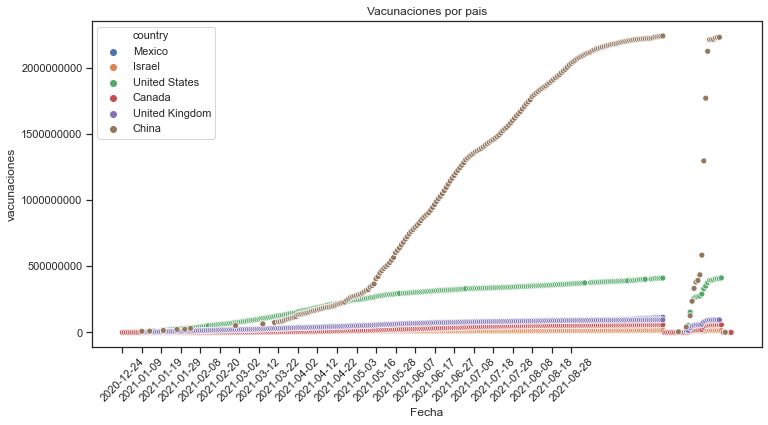

In [53]:
plt.figure(figsize=(12,6))
plt.title("Vacunaciones por pais")
sns.scatterplot(x = paises['date'], y=paises['total_vaccinations'], hue=paises['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x),step = 10), rotation = 45)
plt.xlabel("Fecha")
plt.ylabel("vacunaciones")